# Imports for data manipulation and visualization

In [1]:
import sqlite3 as s3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

# Create the DataFrames with the .xlsx files
df_day = pd.read_excel('iceSalesByDay.xlsx')
df_flavor = pd.read_excel('iceSalesByFlavor.xlsx')
df_temp = pd.read_excel('iceSalesByTemp.xlsx')

In [2]:
# Quick overview of the datasets to check for inconsistencies
print(df_day.info())
print(df_flavor.info())
print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   sales   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week        208 non-null    int64 
 1   units sold  208 non-null    int64 
 2   flavor      208 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  365 non-null    float64
 1   sales        365 non-null    float64
dtypes: float64(2)
memory


# Question 1: What is the most popular flavor of ice cream?

In [3]:
df_flavor.head(1)

,week,units sold,flavor
0,1,6,chocolate


Value Counts For:
flavor
chocolate     52
lemon         52
strawberry    52
vanilla       52
Name: count, dtype: int64



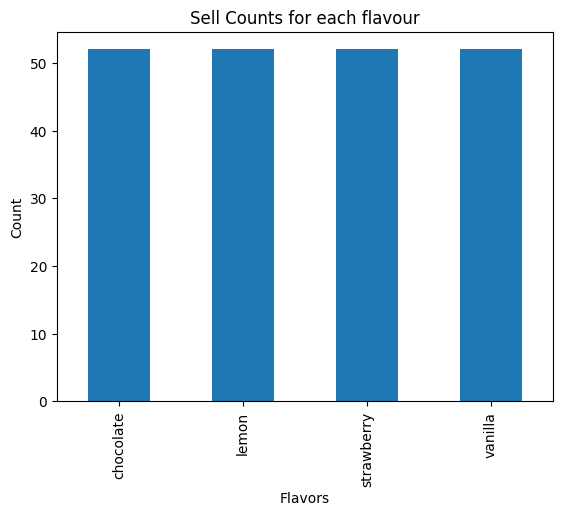

In [4]:
print(f"Value Counts For:\n{df_flavor['flavor'].value_counts()}\n")

# Barchart to visualize the count of each flavor
df_flavor['flavor'].value_counts().plot(kind='bar')
plt.xlabel('Flavors')
plt.ylabel('Count')
plt.title('Sell Counts for each flavour')
plt.show()

The .value_counts() function provides the frequency count of each unique value in a dataset. In this particular dataset provided by an exercise from the Google Data Analytics course, each flavor appears 52 times, indicating that it was sold 52 times for each flavor. However, it raises concerns about the quality and reliability of this dataset.

Based on the available data, it is not possible to determine the impact of different flavors on sales since there is no variation in the number of sales for each flavor. Therefore, we cannot draw conclusions or make inferences about the influence of flavors on sales with this dataset alone.

# Question 2: How does temperature affect sales?

In [5]:
df_temp.head()

,temperature,sales
0,60.217676,39.693565
1,80.372455,61.592665
2,57.674373,33.443372
3,95.800183,80.020249
4,95.170632,80.754129


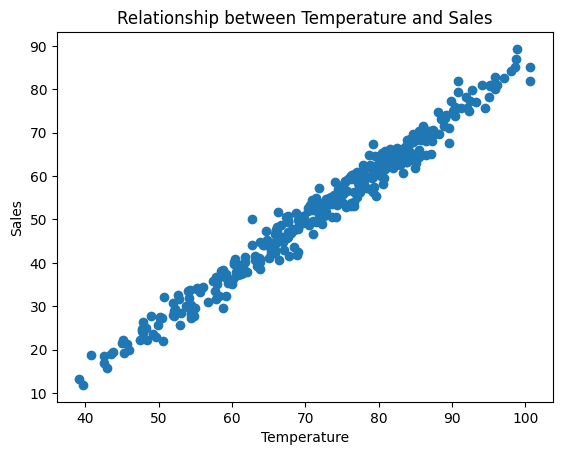

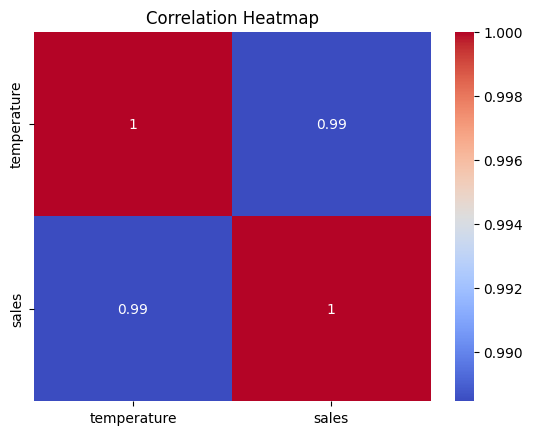

Correlation: 0.9884567529337922


In [6]:
# Create a Scatterplot to check for correlations between two variables
plt.scatter(df_temp['temperature'], df_temp['sales'])
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.title('Relationship between Temperature and Sales')
plt.show()

# Create a correlation matrix
correlation_matrix = df_temp.corr()

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Calculate the correlation between temperature and sales
correlation = df_temp['temperature'].corr(df_temp['sales'])
print(f"Correlation: {correlation}")

Based on the provided code and the output correlation value of 0.988, we can conclude that there is a very strong positive correlation between temperature and sales.

A correlation value of 0.988 indicates a close to perfect positive linear relationship between these two variables. This means that as the temperature increases, the sales also tend to increase consistently. Conversely, as the temperature decreases, the sales tend to decrease as well.

This strong positive correlation suggests that temperature has a significant impact on sales. It implies that temperature can be a crucial factor in predicting and influencing consumer behavior and purchasing patterns. Businesses can leverage this information to make informed decisions and develop effective strategies, such as adjusting marketing campaigns or stocking inventory based on temperature forecasts.

However, it's important to note that correlation does not imply causation. While temperature and sales are highly correlated, there may be other underlying factors or variables that contribute to the observed relationship. Further analysis and consideration of other variables are necessary to establish a causal relationship.

# Question 3: How do weekends and holidays affect sales?

In [7]:
df_day.head()

,date,sales
0,2019-01-01,59.9622
1,2019-01-02,67.0605
2,2019-01-03,74.2350
3,2019-01-04,78.1120
4,2019-01-05,84.7636


In [8]:
print(pd.__version__)

2.2.2


In [9]:
df_day['date'] = pd.to_datetime(df_day['date'])
df_day['weekday'] = df_day['date'].dt.day_name()
df_day.head()

,date,sales,weekday
0,2019-01-01,59.9622,Tuesday
1,2019-01-02,67.0605,Wednesday
2,2019-01-03,74.2350,Thursday
3,2019-01-04,78.1120,Friday
4,2019-01-05,84.7636,Saturday


In [10]:
mean_sales_weekend = df_day[df_day['weekday'].isin(['Saturday', 'Sunday'])]['sales'].mean()
mean_sales_weekday = df_day[df_day['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['sales'].mean()
print(f'Average sales on weekends: {mean_sales_weekend}')
print(f'Average sales on weekdays: {mean_sales_weekday}')

Average sales on weekends: 104.96095288461538
Average sales on weekdays: 104.315669348659


Based on the provided data, we can conclude that the average sales on weekends are practically the same as the average sales on weekdays. The difference between the two averages is minimal, with the average weekend sales being slightly higher by only 0.65 units compared to the average weekday sales.

This raises more concearns about the quality of this data, all medians are pratically the same indicating some possible errors with this data, maybe when it was collected or processed.

This finding suggests that there is no significant difference in sales performance between weekdays and weekends. It indicates a stability in customer preferences and buying behaviors throughout the week.

It is important to consider that even a small difference can have practical implications, such as the need to adjust the sales team or plan specific promotional strategies for certain days. However, based on the current data, it is not possible to identify any distinct sales patterns between weekdays and weekends.

It is recommended to continue monitoring sales over time and conduct additional analyses to check for seasonal variations, long-term trends, or other influences that may differently impact sales on weekdays and weekends.

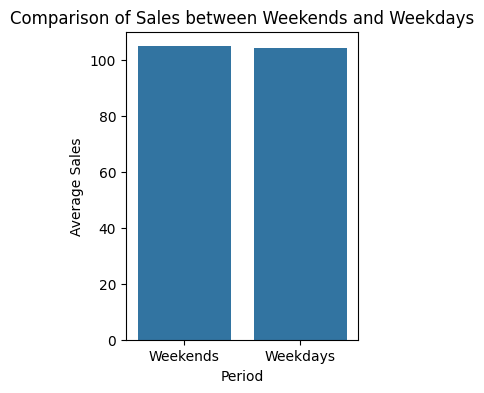

In [11]:
mean_sales = [mean_sales_weekend, mean_sales_weekday]
labels = ['Weekends', 'Weekdays']
plt.figure(figsize=(3, 4))
sns.barplot(x=labels, y=mean_sales)
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Comparison of Sales between Weekends and Weekdays')
plt.show()

# T-Student Statistical Test
The t-test is used to compare the means of two independent samples and determine if there is a significant difference between them. In this case, it's possible to compare <font size="3"><b>sales on weekends and weekdays.</b></font> 

In [12]:
from scipy.stats import ttest_ind

weekend_sales = df_day[df_day['weekday'].isin(['Saturday', 'Sunday'])]['sales']
weekday_sales = df_day[df_day['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['sales']

t_statistic, p_value = ttest_ind(weekend_sales, weekday_sales)
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: 0.20626817032385691
P-Value: 0.8366970801484442


The t-statistic is a measure of the relative difference between the means of the two samples. The higher the absolute value of the t-statistic, the greater the difference between the sample means.

In this case, the t-statistic is 0.20626817032385691. This value indicates that the difference between the means of sales on weekends and weekdays is relatively small.

The p-value is the probability of observing a difference as large or larger between the sample means, assuming that the population means are equal. A p-value smaller than a pre-defined significance level (such as 0.05) indicates that there is statistical evidence to reject the null hypothesis that the population means are equal.

In this case, the p-value is 0.8366970801484442. This means that, assuming the population means are equal, the probability of observing a difference as large or larger between sales on weekends and weekdays is approximately 83.7%. This p-value is greater than the commonly adopted significance level of 0.05, indicating that there is no statistical evidence to suggest that sales are significantly different between weekends and weekdays.

Based on the results of the t-student statistical test, there is <font size="3"><b>no statistical evidence</b></font> to support a significant difference in sales between weekends and weekdays. However, it is important to note that these results are specific to the dataset you have. If you have a larger dataset or wish to generalize the results to the population at large, more comprehensive analyses may be required.